In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz 
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch #Hierachical Clustering

# 1. Phase de prétraitement :

### Import et affichage du jeu de données

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
pd.set_option("display.max_rows",df.shape[0]+1)

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
pd.set_option("display.max_rows",10)

### Les informations générales sur les colonnes et les valeurs de données.

In [6]:
df.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Loan_ID            object 
 1   Gender             object 
 2   Married            object 
 3   Dependents         object 
 4   Education          object 
 5   Self_Employed      object 
 6   ApplicantIncome    int64  
 7   CoapplicantIncome  float64
 8   LoanAmount         float64
 9   Loan_Amount_Term   float64
 10  Credit_History     float64
 11  Property_Area      object 
 12  Loan_Status        object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Les valeurs manquantes

In [7]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
# traiter les valeurs manquantes 
# on va créer 2 listes (categoriel et numerique)
cat_data=[]
num_data=[]
for i,c in enumerate (df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [11]:
# Pour les variables categoriques on va remplacer les valeurs manquantes par les valeurs les plus frequentes
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [12]:
cat_data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [13]:
# Pour les variables numeriques on va remplacer les valeurs manquantes par la valeur precedente de la meme colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

#### Encodage : remplacer des valeurs categoriques en valeurs numeriques

In [14]:
target_value={"Y":1,"N":0}
target=cat_data["Loan_Status"]
cat_data.drop("Loan_Status",axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [15]:
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [16]:
#supprimer "Loan_id"
cat_data.drop("Loan_ID",axis=1,inplace=True)

In [17]:
df=pd.concat([cat_data,num_data,target],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


##### Gender : 1:Male, 0:Female
##### Married : 1: yes, 0:Non
##### Dependents : le nombre d'enfants
##### Education : 1: NOT Graduate, 0: Graduate
##### Self_Employed : 1:Yes, 0: NON
##### Property_Area : 0:Rural, 1:Semiurban, 2:Urban
##### Loan_Status : "Y":1,"N":0

# 2. Phase de Visualisation

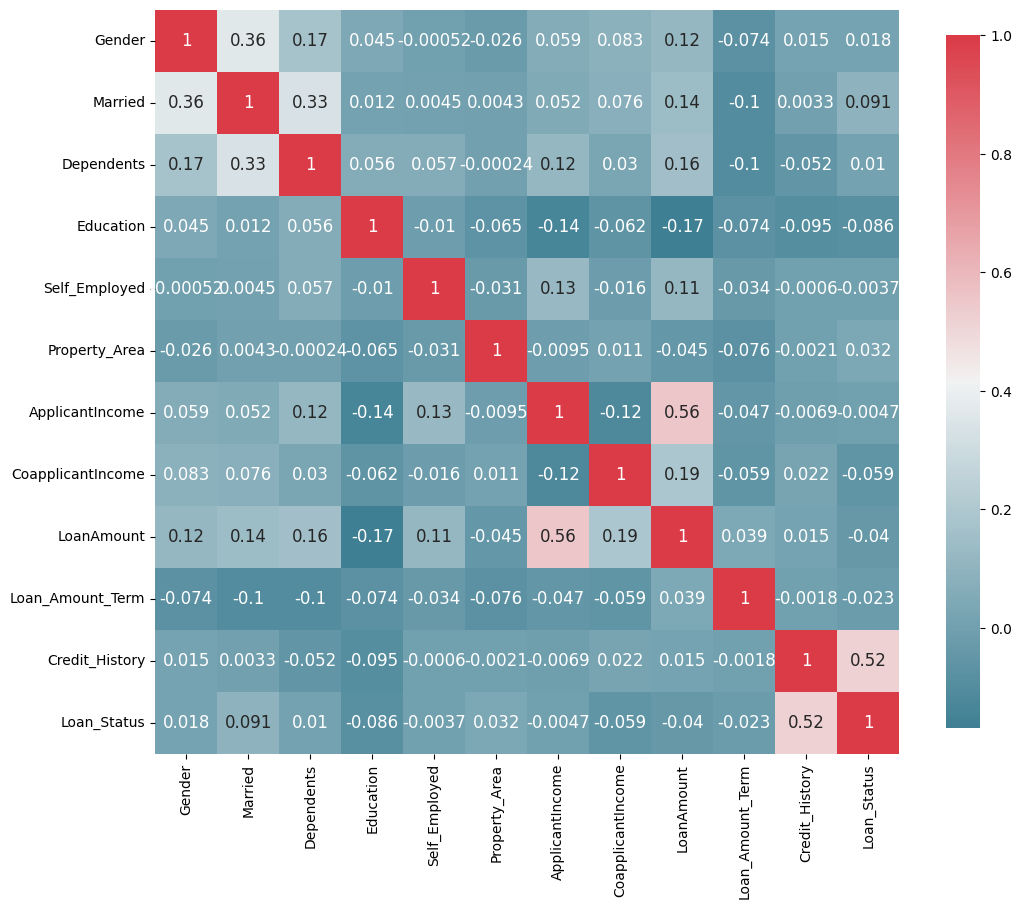

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(df)

### Les corrélations positives sont affichées en rouge et les corrélations négatives en bleu. L'intensité de la couleur est proportionnelle aux coefficients de corrélation. A droite du corrélogramme, la légende des couleurs indique les coefficients de corrélation et les couleurs correspondantes.

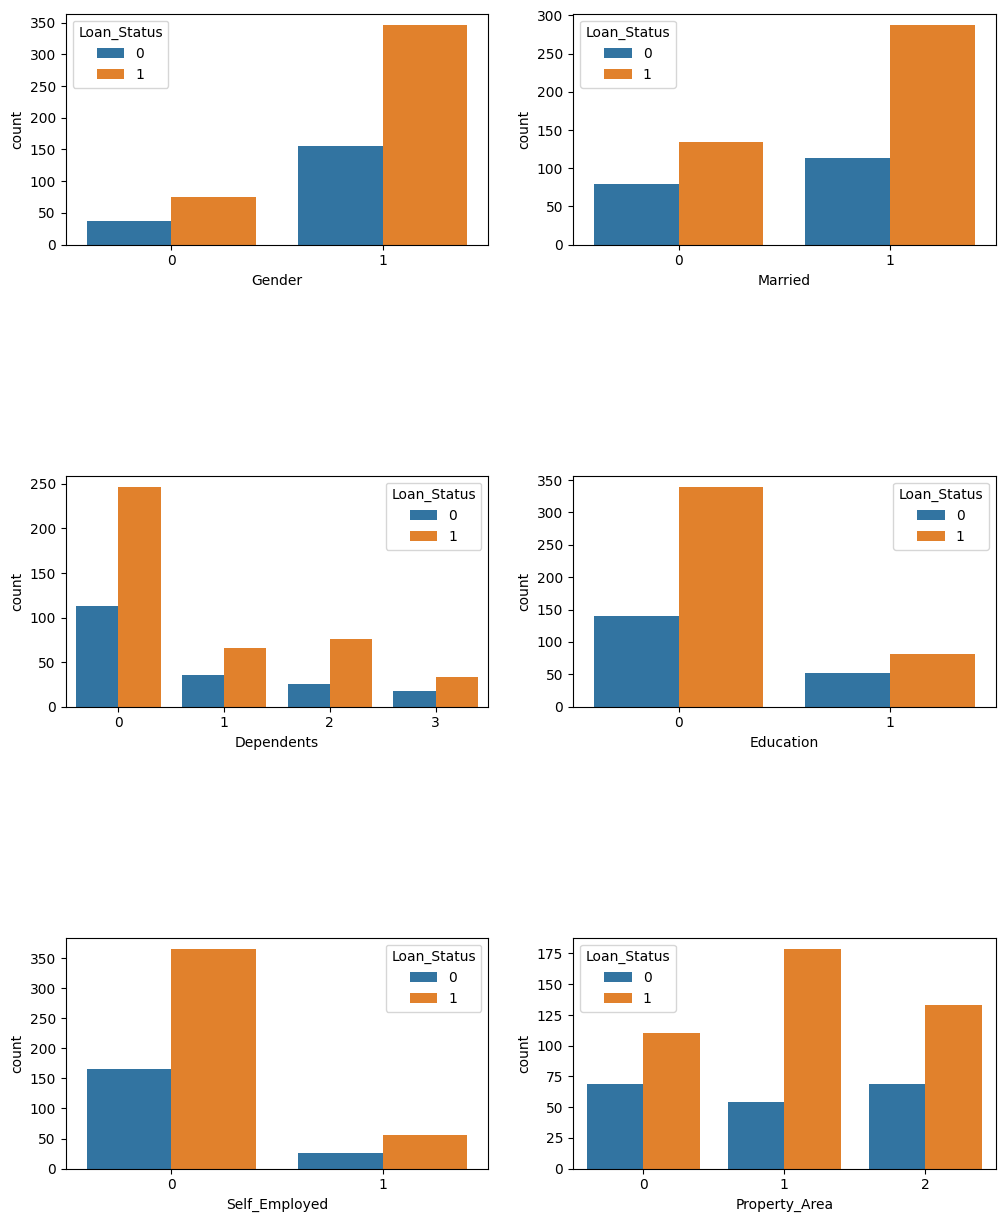

In [19]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_data):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#### Les tracés ci-dessus transmettent les éléments suivants concernant l'ensemble de données :

#### 1. Sexe : Il y a plus d'hommes que de femmes (environ 3x)
#### 2. Etat civil : 2/3 de la population dans l'ensemble de données sont mariés ; Les candidats mariés sont plus susceptibles d'obtenir des prêts.
#### 3. Personnes à charge : la majorité qui n'a aucune personne à charge est plus susceptible d'être acceptée pour un prêt.
#### 4. Éducation : environ 5/6 de la population est diplômée et les diplômés ont une proportion plus élevée d'approbation de prêt
#### 5. Emploi : 5/6ème de la population ne sont pas indépendantes.
#### 6. Superficie de la propriété : Plus de candidats de la zone semi-urbaine et également susceptibles d'obtenir des prêts

The percentage of Y class : 0.69
The percentage of N class : 0.31
Statut d'approbation du prêt : environ 2/3 des candidats ont obtenu un prêt.


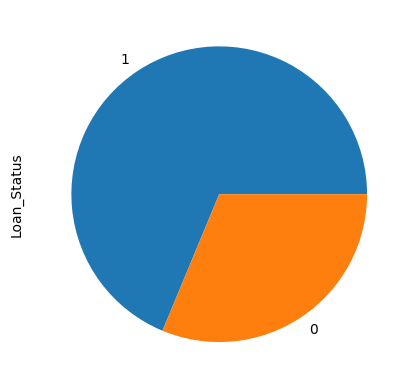

In [20]:
df.Loan_Status.value_counts().plot(kind="pie")
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print("Statut d'approbation du prêt : environ 2/3 des candidats ont obtenu un prêt.")

 Les candidats ayant des antécédents de crédit sont beaucoup plus susceptibles d'être acceptés. 


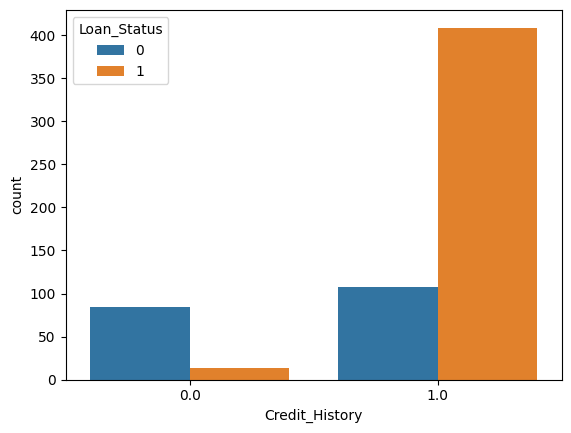

In [21]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
print(" Les candidats ayant des antécédents de crédit sont beaucoup plus susceptibles d'être acceptés. ")

IndexError: index 3 is out of bounds for axis 0 with size 3

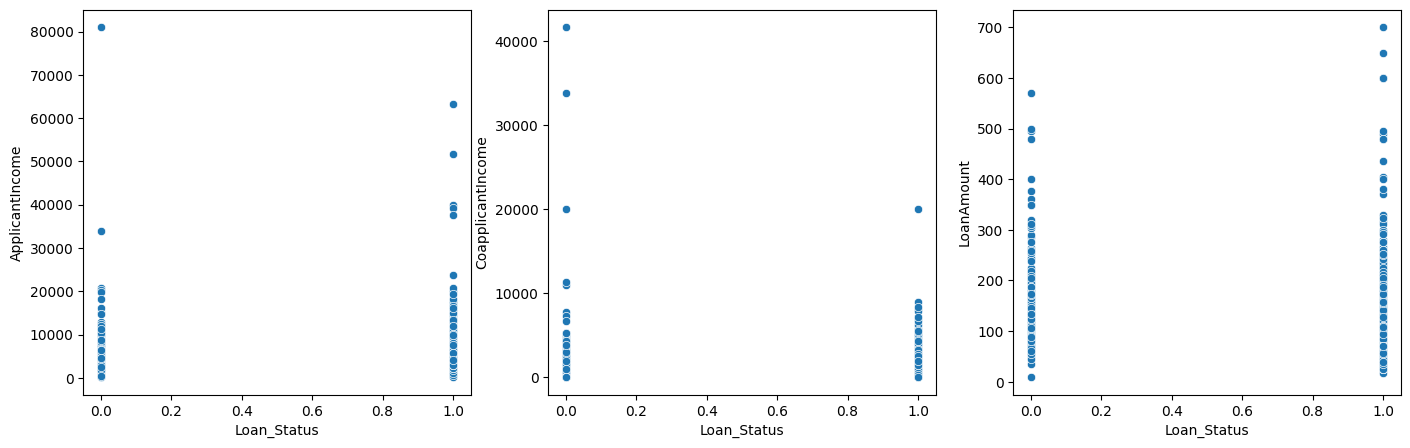

In [32]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(num_data):
    sns.scatterplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

plt.subplots_adjust(hspace=1)

#### Pour les colonnes numériques, il n'y a pas de relation significative avec le statut d'approbation du prêt.

# 3. Phase de Realisation du model

In [23]:
X=df[["Gender","Credit_History","Married","ApplicantIncome"]]
y=target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

##  Logistic regression

In [24]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print("Accuracy={:.2f}".format(lg.score(X_test, y_test)))
print("AUC={:.2f}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy=0.85
AUC=0.76


### nous avons un score de 85%
### AUC est proche de 1 nous pouvons considérer le modele comme bon

## Arbre de decision 

In [25]:
clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth=3)  
clf.fit(X_train, y_train)   #fitting our model
y_pred=clf.predict(X_test)   # evaluating our model
print("score:{:.2f}".format(accuracy_score(y_test, y_pred)))
print("AUC={:.2f}".format(metrics.roc_auc_score(y_test, y_pred)))

score:0.83
AUC=0.77


### nous avons un score de 83%
### AUC est proche de 1 nous pouvons considérer le modele comme bon

## une forêt aléatoire

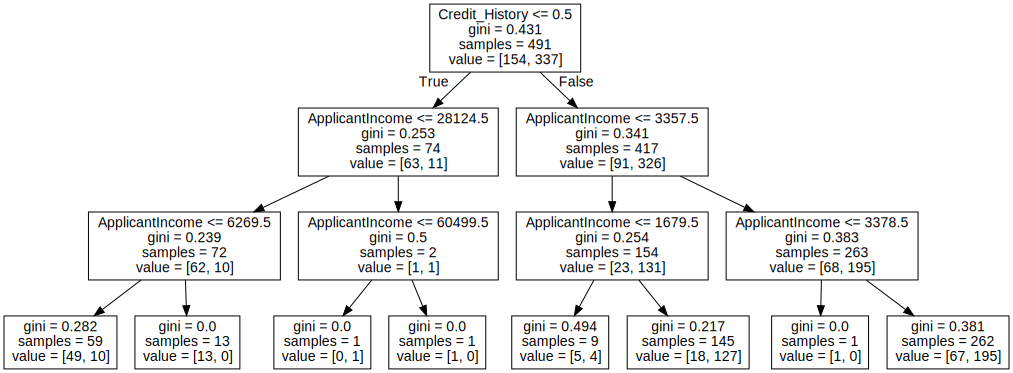

In [26]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [27]:
clf=RandomForestClassifier(n_estimators=50)  #Creating a random forest with 100 decision trees
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:{:.2f}".format(accuracy_score(y_test, y_pred)))  #Measuring the accuracy of our model
print("AUC={:.2f}".format(metrics.roc_auc_score(y_test, y_pred)))

Accuracy:0.74
AUC=0.72


### nous avons un score de 74%
### AUC est proche de 1 nous pouvons considérer le modele comme bon